In [1]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
import splitfolders
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'H:/Shortcuts/Research paper/flowerNET/flower/train'
valid_path = 'H:/Shortcuts/Research paper/flowerNET/flower/val'
test_path = 'H:/Shortcuts/Research paper/flowerNET/flower/test'

# useful for getting number of classes
folders = glob('H:/Shortcuts/Research paper/flowerNET/flower/train/*')
len(folders)

3

In [3]:
base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=IMAGE_SIZE + [3])

    
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

 #imports the MobileNetV2 model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
prediction=Dense(3,activation='softmax')(x) #final layer with softmax activation for N classes

model=Model(inputs=base_model.input,outputs=prediction) #specify the inputs and outputs


# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [4]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0,
                                   vertical_flip=False,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3037 images belonging to 3 classes.
Found 867 images belonging to 3 classes.


In [6]:
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)


Epoch 1/35
95/95 [==============================] - 369s 4s/step - loss: 0.2806 - accuracy: 0.8940 - val_loss: 0.1460 - val_accuracy: 0.9469
Epoch 2/35
95/95 [==============================] - 324s 3s/step - loss: 0.1047 - accuracy: 0.9562 - val_loss: 0.1001 - val_accuracy: 0.9596
Epoch 3/35
95/95 [==============================] - 308s 3s/step - loss: 0.0801 - accuracy: 0.9730 - val_loss: 0.1465 - val_accuracy: 0.9539
Epoch 4/35
95/95 [==============================] - 303s 3s/step - loss: 0.0915 - accuracy: 0.9671 - val_loss: 0.1066 - val_accuracy: 0.9608
Epoch 5/35
95/95 [==============================] - 283s 3s/step - loss: 0.0697 - accuracy: 0.9756 - val_loss: 0.0930 - val_accuracy: 0.9677
Epoch 6/35
95/95 [==============================] - 288s 3s/step - loss: 0.0450 - accuracy: 0.9812 - val_loss: 0.1344 - val_accuracy: 0.9573
Epoch 7/35
95/95 [==============================] - 294s 3s/step - loss: 0.0433 - accuracy: 0.9825 - val_loss: 0.1654 - val_accuracy: 0.9504
Epoch 8/35
95

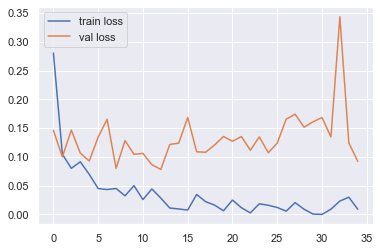

In [8]:
# ploting val loss and traing loss
sns.set_theme()
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/LossVal_loss_MobileNetV2.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/LossVal_loss_MobileNetV2')
plt.show()

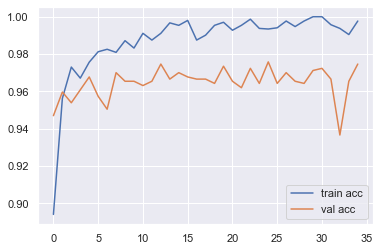

In [9]:
#plotting val acc and training acc
sns.set_theme()
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/accuracy_MobileNetV2.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/accuracy_VGG16')
plt.show()

In [10]:
model.save('H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/MobileNetV2.h5')

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [4]:
from keras.models import load_model
model = load_model('H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/MobileNetV2.h5')

In [11]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
val_loss, val_acc = model.evaluate(val_set, steps=16)
print("Traning Loss and traing accurcy: ",train_loss, train_acc )
print("Validation Loss and Validation accurcy: ",val_loss, val_acc )

16/16 [==============================] - 37s 2s/step - loss: 0.1075 - accuracy: 0.9746
Traning Loss and traing accurcy:  0.002822871319949627 1.0
Validation Loss and Validation accurcy:  0.10750623792409897 0.974609375


In [5]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=False,
    image_size=(224,224),
    batch_size=32
)

Found 438 files belonging to 3 classes.


In [6]:
class_names = testing_set.class_names
class_names

['Black Spot', 'Downy mildew', 'Fresh Leaf']

In [7]:
# Extracting all test image and corrosponding labels from tesing image
test_label=[]
test_img=[]
for img, label in testing_set:
  #print(label.numpy())
  test_label.append(label.numpy())
  test_img.append(img.numpy())
print("Total batch of test label: ",len(test_label))
print("Total batch of test image: ",len(test_img))

###############################################################################################

# Extracting only all test image  from tesing image batch list
actual_img=[]
for i in range(len(test_img)):
  for i in test_img[i]:
    i = i*(1/255) # we have to rescale the test image as well to feed the model
    actual_img.append(i)

print("Total Number of image: ", len(actual_img))


# Extracting only all test image  labels from tesing image batch list
actual_label=[]
for i in range(len(test_label)):
  for i in test_label[i]:
    actual_label.append(class_names[i])
     
    

print("Total number of image label : ",len(actual_label))

Total batch of test label:  14
Total batch of test image:  14
Total Number of image:  438
Total number of image label :  438


Black Spot


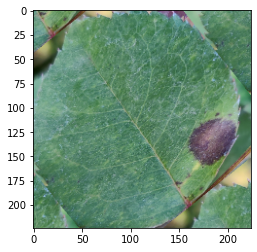

In [8]:
print(actual_label[27])
plt.imshow(actual_img[27])

In [9]:
import time
from datetime import timedelta
start = time.time()

# make prediction using loaded model
predicted_label=[]
for img in actual_img:
  img_array = tf.expand_dims(img, 0)
  predictions = model.predict(img_array)
  label= class_names[np.argmax(predictions)]
  
  predicted_label.append(label)
 
end = time.time()
print(timedelta(seconds=end-start))

len(predicted_label)

0:00:43.812288


438

In [17]:
# Printing all evaluation matrix
print("Test accuracy: ",accuracy_score(actual_label, predicted_label))
print(classification_report(actual_label, predicted_label))

Test accuracy:  0.9771689497716894
              precision    recall  f1-score   support

  Black Spot       0.97      0.98      0.97       145
Downy mildew       0.99      0.99      0.99       149
  Fresh Leaf       0.97      0.96      0.97       144

    accuracy                           0.98       438
   macro avg       0.98      0.98      0.98       438
weighted avg       0.98      0.98      0.98       438



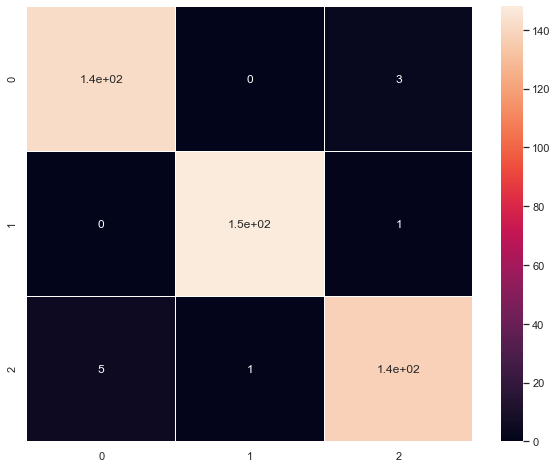

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_label, predicted_label)
import seaborn as sns
ax= plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, linewidth=.5)
plt.plot()
plt.savefig("H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/confussion_matrix_MobileNetV2.svg")
plt.savefig("H:/Shortcuts/Research paper/flowerNET/35-epoch/MobileNetV2/confussion_matrix_MobileNetV2")
plt.show()